## IMPORT MODULES

In [1]:
import nltk
from nltk.corpus import stopwords
from glob import glob
import gensim    
from gensim import corpora, models, similarities
import pyLDAvis
import pyLDAvis.gensim
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
from random import sample
import numpy as np
import random
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import warnings
warnings.filterwarnings("ignore")

C:\Users\Camilla\Documents\Nuova cartella\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\Camilla\Documents\Nuova cartella\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Camilla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Camilla\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## TOPIC MODELLING

### Importing the Data from a CSV file

In [2]:
topicmodelling= []
with open("C:/Users/Camilla/Desktop/BigData/HEllo.csv",mode="r", encoding= "utf-8", newline="") as fi:
    cavolo = csv.reader(fi)
    for row in cavolo:
        if len(row) == 2: #here I am skipping some part of the data because when I have tried to save the scraped file it duplicated some parts
            topicmodelling.append(row[1])

In [3]:
len(topicmodelling) #checking the length to see if it corresponds to the number of articles scraped

123

### Cleaning the Data

In [5]:
punctuation = [":", ",", ".", ":", "?","!"] 

In [6]:
ubi =["".join([l for l in one if l not in punctuation]) for one in topicmodelling]  #remove punctuation
ubi=[one.lower() for one in ubi]  # convert to lower case
ubi=[" ".join(one.split()) for one in ubi] 
ubi =[one.replace("\\xa0", "").replace("\'", "").replace("—", ""). replace("=", "").replace ('”', "").replace("“", "") for one in ubi] #replacing those that are simbols for space

In [7]:
len(ubi) #checking the lenght to be sure nothing as changed

123

In [8]:
ubi[0][:500] #Checking how the first item look

'[  the website  revista  libertalia  recently published an article in spanish with extensive quotes from an interview conducted with me the article is entitled  voces sobre la renta básica (ii) ¿está justificada  [voices on basic income (ii) is it justified] it’s author is pablo magaña the spanish version was published on february 28 2019 the author created but did not publish an english version of the article the quotes below reproduce the entire english version with no additional editing   voi'

## Inserting stopwords removal

In [9]:
stopwords=stopwords.words("english") #WARNING: for some reason this doesn't work some time, no clue why. In that case, you just need to re-run the first cell where I import the stopword thing and then 

In [10]:
ubi_clean = [" ".join([w for w in one.split() if w not in stopwords]) for one in ubi]


In [11]:
ubi_clean[0][:500]

'[ website revista libertalia recently published article spanish extensive quotes interview conducted article entitled voces sobre la renta básica (ii) ¿está justificada [voices basic income (ii) justified] it’s author pablo magaña spanish version published february 28 2019 author created publish english version article quotes reproduce entire english version additional editing voices basic income (ii) justified idea basic income raises many hopes eyebrows article defenders explain us view best w'

## Stemming

In [12]:
stemmer = nltk.stem.snowball.EnglishStemmer()
ubi_stemmed = [" ".join([stemmer.stem(word) for word in one.split()]) for one in ubi_clean]
ubi_stemmed[0][:500]

'[ websit revista libertalia recent publish articl spanish extens quot interview conduct articl entitl voce sobr la renta básica (ii) ¿está justificada [voic basic incom (ii) justified] it author pablo magaña spanish version publish februari 28 2019 author creat publish english version articl quot reproduc entir english version addit edit voic basic incom (ii) justifi idea basic incom rais mani hope eyebrow articl defend explain us view best way justifi howev order make discuss interest also ask '

## Nouns and Adjectives

I previuosly did that removing everthing that was not a name or an adjective, but I don't think it would have improved at all the model and instead it would take away many information I could be interested in.


## Bi-grams

In [13]:
ubi_bigrams = [["_".join(tup) for tup in nltk.ngrams(one.split(),2)] for one in ubi_stemmed]
assert len(ubi_stemmed)==len(ubi_bigrams)
ubi_uniandbigrams = []
for a,b in zip([one.split() for one in ubi_stemmed], ubi_bigrams):
    ubi_uniandbigrams.append(a + b)


In [14]:
ubi_uniandbigrams[0][:10]

['[',
 'websit',
 'revista',
 'libertalia',
 'recent',
 'publish',
 'articl',
 'spanish',
 'extens',
 'quot']

## LDA


###  Without Filtering the Extremes

In [19]:
ldainput_m1 = ubi_uniandbigrams     
id2word_m1 = corpora.Dictionary(ldainput_m1) 
ldacorpus_m1 = [id2word_m1.doc2bow(doc) for doc in ldainput_m1]
tfidfcorpus_m1 = models.TfidfModel(ldacorpus_m1)
lda_m1_10 = models.ldamodel.LdaModel(corpus=tfidfcorpus_m1[ldacorpus_m1],id2word=id2word_m1,num_topics=10)
lda_m1_10.print_topics(num_words=6)


2019-05-27 12:11:12,277 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-05-27 12:11:12,787 : INFO : built Dictionary(69555 unique tokens: ['"the', '"the_indepentarian"', '&', '&_public', '(1988)']...) from 123 documents (total 195431 corpus positions)
2019-05-27 12:11:13,115 : INFO : collecting document frequencies
2019-05-27 12:11:13,116 : INFO : PROGRESS: processing document #0
2019-05-27 12:11:13,215 : INFO : calculating IDF weights for 123 documents and 69554 features (137674 matrix non-zeros)
2019-05-27 12:11:13,729 : INFO : using symmetric alpha at 0.1
2019-05-27 12:11:13,730 : INFO : using symmetric eta at 0.1
2019-05-27 12:11:13,761 : INFO : using serial LDA version on this node
2019-05-27 12:11:13,977 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 123 documents, updating model once every 123 documents, evaluating perplexity every 123 documents, iterating 50x with a convergence threshold of 0.001000
2019-0

[(0,
  '0.000*"experi" + 0.000*"count" + 0.000*"suplici" + 0.000*"mongolia" + 0.000*"confer" + 0.000*"senat_suplici"'),
 (1,
  '0.000*"prison" + 0.000*"hugh" + 0.000*"spend" + 0.000*"bower" + 0.000*"budget" + 0.000*"gi"'),
 (2,
  '0.000*"chronogram" + 0.000*"bike" + 0.000*"2018_particip" + 0.000*"1999" + 0.000*"oil" + 0.000*"counter-wav"'),
 (3,
  '0.000*"lewi" + 0.000*"michael_lewi" + 0.000*"sexual" + 0.000*"michael" + 0.000*"piketti" + 0.000*"non-product"'),
 (4,
  '0.000*"toy" + 0.000*"oil" + 0.000*"tax" + 0.000*"properti" + 0.000*"widerquist" + 0.000*"bill"'),
 (5,
  '0.000*"brain" + 0.000*"bi" + 0.000*"experi" + 0.000*"labor" + 0.000*"vision" + 0.000*"human"'),
 (6,
  '0.000*"sale_tax" + 0.000*"sale" + 0.000*"purpos_mean" + 0.000*"claim_ubi" + 0.000*"tax" + 0.000*"social_connect"'),
 (7,
  '0.000*"experi" + 0.000*"big" + 0.000*"1998" + 0.000*"sheahen" + 0.000*"chronogram" + 0.000*"kela"'),
 (8,
  '0.000*"apf" + 0.000*"bi" + 0.000*"oil" + 0.000*"hammond" + 0.000*"alaska" + 0.000*"f

In [21]:
ldainput_m1 = ubi_uniandbigrams     
id2word_m1 = corpora.Dictionary(ldainput_m1) 
ldacorpus_m1 = [id2word_m1.doc2bow(doc) for doc in ldainput_m1]
tfidfcorpus_m1 = models.TfidfModel(ldacorpus_m1)
lda_m1_5 = models.ldamodel.LdaModel(corpus=tfidfcorpus_m1[ldacorpus_m1],id2word=id2word_m1,num_topics=5)
lda_m1_5.print_topics(num_words=6)


2019-05-27 12:18:05,782 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-05-27 12:18:06,279 : INFO : built Dictionary(69555 unique tokens: ['"the', '"the_indepentarian"', '&', '&_public', '(1988)']...) from 123 documents (total 195431 corpus positions)
2019-05-27 12:18:06,727 : INFO : collecting document frequencies
2019-05-27 12:18:06,729 : INFO : PROGRESS: processing document #0
2019-05-27 12:18:06,846 : INFO : calculating IDF weights for 123 documents and 69554 features (137674 matrix non-zeros)
2019-05-27 12:18:07,360 : INFO : using symmetric alpha at 0.2
2019-05-27 12:18:07,362 : INFO : using symmetric eta at 0.2
2019-05-27 12:18:07,399 : INFO : using serial LDA version on this node
2019-05-27 12:18:07,551 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 123 documents, updating model once every 123 documents, evaluating perplexity every 123 documents, iterating 50x with a convergence threshold of 0.001000
2019-05

[(0,
  '0.000*"dividend" + 0.000*"widerquist" + 0.000*"experi" + 0.000*"apf" + 0.000*"tax" + 0.000*"alaska"'),
 (1,
  '0.000*"experi" + 0.000*"properti" + 0.000*"big" + 0.000*"job" + 0.000*"2018" + 0.000*"autom"'),
 (2,
  '0.000*"experi" + 0.000*"properti" + 0.000*"bi" + 0.000*"justic" + 0.000*"bi_news" + 0.000*"jpa"'),
 (3,
  '0.000*"experi" + 0.000*"purpos_mean" + 0.000*"social" + 0.000*"tax" + 0.000*"social_connect" + 0.000*"fund"'),
 (4,
  '0.000*"oil" + 0.000*"alaska" + 0.000*"bi" + 0.000*"big" + 0.000*"tax" + 0.000*"widerquist"')]

In [23]:
lda_m1_5.top_topics(tfidfcorpus_m1[ldacorpus_m1])

[([(6.066922e-05, 'oil'),
   (5.061661e-05, 'alaska'),
   (4.8163347e-05, 'bi'),
   (4.815255e-05, 'big'),
   (4.6712667e-05, 'tax'),
   (4.38034e-05, 'widerquist'),
   (4.242017e-05, 'experi'),
   (4.1945354e-05, 'karl'),
   (4.0398765e-05, 'dividend'),
   (3.9907736e-05, 'karl_widerquist'),
   (3.9319053e-05, 'billion'),
   (3.924651e-05, 'fund'),
   (3.883596e-05, 'brain'),
   (3.860284e-05, 'labor'),
   (3.6429366e-05, 'support'),
   (3.6070385e-05, 'count'),
   (3.5638655e-05, 'congress'),
   (3.4886583e-05, 'ubi'),
   (3.4517274e-05, 'apf'),
   (3.4211076e-05, 'human')],
  -2.924496297942984),
 ([(5.1015897e-05, 'dividend'),
   (4.7404563e-05, 'widerquist'),
   (4.497488e-05, 'experi'),
   (4.451736e-05, 'apf'),
   (4.1770894e-05, 'tax'),
   (3.9706694e-05, 'alaska'),
   (3.9299324e-05, 'karl'),
   (3.709056e-05, 'job'),
   (3.6150595e-05, 'sale_tax'),
   (3.5486886e-05, 'karl_widerquist'),
   (3.456206e-05, 'ubi'),
   (3.4050357e-05, '1998'),
   (3.3834574e-05, 'chronogram'),
  

## Filtering the Extremes

I will try to run this model estimating it with different numbers of topics (3-5-10). After doing so, I will just pick and further analyze the one in which the topics seem to be more indicative and interesting. 

In [25]:
ldainput_m2 = ubi_uniandbigrams     
id2word_m2 = corpora.Dictionary(ldainput_m2) 
id2word_m2.filter_extremes(no_below=10, no_above=0.5)
ldacorpus_m2 = [id2word_m2.doc2bow(doc) for doc in ldainput_m2]



2019-05-27 12:18:54,456 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-05-27 12:18:55,056 : INFO : built Dictionary(69555 unique tokens: ['"the', '"the_indepentarian"', '&', '&_public', '(1988)']...) from 123 documents (total 195431 corpus positions)
2019-05-27 12:18:55,227 : INFO : discarding 68547 tokens: [('"the', 88), ('"the_indepentarian"', 88), ('&_public', 1), ('(1988)', 1), ('(1988)_philosophi', 1), ('(1991)', 1), ('(1991)_philosophi', 1), ('(1996)', 88), ('(1996)_publish', 88), ('(1999)', 1)]...
2019-05-27 12:18:55,229 : INFO : keeping 1008 tokens which were in no less than 10 and no more than 61 (=50.0%) documents
2019-05-27 12:18:55,284 : INFO : resulting dictionary: Dictionary(1008 unique tokens: ['&', '(or', '(the', '40', '5']...)


### 3 TOPICS

In [74]:
tfidfcorpus_m2 = models.TfidfModel(ldacorpus_m2)
lda_m2_3 = models.ldamodel.LdaModel(corpus=tfidfcorpus_m2[ldacorpus_m2],id2word=id2word_m2,num_topics=3)
lda_m2_3.print_topics(num_words= 5)

2019-05-27 15:22:37,248 : INFO : collecting document frequencies
2019-05-27 15:22:37,249 : INFO : PROGRESS: processing document #0
2019-05-27 15:22:37,254 : INFO : calculating IDF weights for 123 documents and 1007 features (21314 matrix non-zeros)
2019-05-27 15:22:37,260 : INFO : using symmetric alpha at 0.3333333333333333
2019-05-27 15:22:37,262 : INFO : using symmetric eta at 0.3333333333333333
2019-05-27 15:22:37,263 : INFO : using serial LDA version on this node
2019-05-27 15:22:37,265 : INFO : running online (single-pass) LDA training, 3 topics, 1 passes over the supplied corpus of 123 documents, updating model once every 123 documents, evaluating perplexity every 123 documents, iterating 50x with a convergence threshold of 0.001000
2019-05-27 15:22:37,266 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-05-27 15:22:37,563 : INFO : -8.786 per-word bound, 441.5 perplexity estimate based on a h

[(0,
  '0.004*"experi" + 0.003*"tax" + 0.003*"claim" + 0.003*"job" + 0.003*"welfar"'),
 (1,
  '0.004*"dividend" + 0.004*"alaska" + 0.004*"properti" + 0.004*"apf" + 0.003*"oil"'),
 (2,
  '0.004*"big" + 0.004*"experi" + 0.003*"net" + 0.003*"lewi" + 0.003*"job"')]

In [75]:
lda_m2_3.top_topics(tfidfcorpus_m2[ldacorpus_m2])

[([(0.0043422994, 'experi'),
   (0.0030024552, 'tax'),
   (0.0028111257, 'claim'),
   (0.0027366925, 'job'),
   (0.0025711455, 'welfar'),
   (0.0024375871, 'august'),
   (0.0023560696, 'june'),
   (0.0023326892, 'talk'),
   (0.0022173908, 'depress'),
   (0.0022080129, 'congress'),
   (0.002197287, 'big'),
   (0.0021546234, 'gave'),
   (0.0021325727, 'individu'),
   (0.0021306924, '2018'),
   (0.0021169265, 'reduc'),
   (0.002071899, 'welfar_system'),
   (0.0020078802, 'right'),
   (0.0019832326, 'idea'),
   (0.0019582394, 'particip'),
   (0.0019518005, "i'm")],
  -1.5340481231367915),
 ([(0.0039882953, 'big'),
   (0.0037556184, 'experi'),
   (0.0030024312, 'net'),
   (0.0029045213, 'lewi'),
   (0.002795433, 'job'),
   (0.0026422744, 'labor'),
   (0.002636764, 'michael'),
   (0.0026232172, 'michael_lewi'),
   (0.0024647738, 'tax'),
   (0.002382205, 'alaska'),
   (0.0023502402, 'polici'),
   (0.0023220915, 'human'),
   (0.0023160568, 'play'),
   (0.0022971986, 'june'),
   (0.0022664343, 

###  5 TOPICS

In [35]:
tfidfcorpus_m2 = models.TfidfModel(ldacorpus_m2)
lda_m2_5 = models.ldamodel.LdaModel(corpus=tfidfcorpus_m2[ldacorpus_m2],id2word=id2word_m2,num_topics=5)
lda_m2_5.print_topics(num_words=6)


2019-05-27 13:28:13,307 : INFO : collecting document frequencies
2019-05-27 13:28:13,308 : INFO : PROGRESS: processing document #0
2019-05-27 13:28:13,316 : INFO : calculating IDF weights for 123 documents and 1007 features (21314 matrix non-zeros)
2019-05-27 13:28:13,321 : INFO : using symmetric alpha at 0.2
2019-05-27 13:28:13,322 : INFO : using symmetric eta at 0.2
2019-05-27 13:28:13,323 : INFO : using serial LDA version on this node
2019-05-27 13:28:13,324 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 123 documents, updating model once every 123 documents, evaluating perplexity every 123 documents, iterating 50x with a convergence threshold of 0.001000
2019-05-27 13:28:13,326 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-05-27 13:28:13,670 : INFO : -10.878 per-word bound, 1881.9 perplexity estimate based on a held-out corpus of 123 docume

[(0,
  '0.006*"big" + 0.003*"spend" + 0.003*"poverti" + 0.003*"depress" + 0.003*"unit" + 0.003*"budget"'),
 (1,
  '0.005*"oil" + 0.004*"alaska" + 0.004*"justic" + 0.004*"dividend" + 0.004*"properti" + 0.003*"bill"'),
 (2,
  '0.004*"lewi" + 0.004*"june" + 0.004*"michael_lewi" + 0.004*"michael" + 0.003*"experi" + 0.003*"2014"'),
 (3,
  '0.004*"experi" + 0.003*"definit" + 0.003*"big" + 0.003*"tax" + 0.003*"januari" + 0.003*"polici"'),
 (4,
  '0.004*"experi" + 0.004*"job" + 0.003*"net" + 0.003*"individu" + 0.003*"right" + 0.003*"particip"')]

In [30]:
lda_m2_5.top_topics(tfidfcorpus_m2[ldacorpus_m2])

[([(0.004405354, 'oil'),
   (0.0041272193, 'dividend'),
   (0.0038324252, 'alaska'),
   (0.0037548607, 'big'),
   (0.003478612, 'experi'),
   (0.0032150312, 'fund'),
   (0.003068708, 'particip'),
   (0.0028701117, 'bill'),
   (0.0027836089, 'individu'),
   (0.0027248512, 'parti'),
   (0.0025857582, 'organ'),
   (0.0025163752, 'model'),
   (0.002496801, 'idea'),
   (0.0024623356, 'june'),
   (0.002418388, 'perman'),
   (0.0023842119, 'senat'),
   (0.002306247, 'perman_fund'),
   (0.00226781, 'vote'),
   (0.0022611395, 'activist'),
   (0.00224369, 'januari')],
  -1.4549854322378881),
 ([(0.0051302747, 'job'),
   (0.0036095004, 'tax'),
   (0.0035047443, 'right'),
   (0.0033512998, 'play'),
   (0.0032557854, 'lewi'),
   (0.0031977803, 'autom'),
   (0.0031676954, 'michael_lewi'),
   (0.0029707816, 'talk'),
   (0.002887815, "i'm"),
   (0.0027759797, 'gave'),
   (0.0027754928, 'michael'),
   (0.002487619, 'labor'),
   (0.0024317247, 'claim'),
   (0.0023863146, 'reduc'),
   (0.0023827052, 'net

### 10 TOPICS

In [31]:
tfidfcorpus_m2 = models.TfidfModel(ldacorpus_m2)
lda_m2_10 = models.ldamodel.LdaModel(corpus=tfidfcorpus_m2[ldacorpus_m2],id2word=id2word_m2,num_topics=10)
lda_m2_10.print_topics(num_words=6)

2019-05-27 12:25:15,685 : INFO : collecting document frequencies
2019-05-27 12:25:15,687 : INFO : PROGRESS: processing document #0
2019-05-27 12:25:15,698 : INFO : calculating IDF weights for 123 documents and 1007 features (21314 matrix non-zeros)
2019-05-27 12:25:15,709 : INFO : using symmetric alpha at 0.1
2019-05-27 12:25:15,710 : INFO : using symmetric eta at 0.1
2019-05-27 12:25:15,712 : INFO : using serial LDA version on this node
2019-05-27 12:25:15,716 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 123 documents, updating model once every 123 documents, evaluating perplexity every 123 documents, iterating 50x with a convergence threshold of 0.001000
2019-05-27 12:25:15,718 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-05-27 12:25:16,419 : INFO : -18.158 per-word bound, 292573.3 perplexity estimate based on a held-out corpus of 123 doc

[(0,
  '0.004*"pilot" + 0.004*"keep" + 0.003*"most" + 0.003*"magazin" + 0.003*"volunt" + 0.003*"individu"'),
 (1,
  '0.006*"june" + 0.005*"difficulti" + 0.005*"cut" + 0.005*"understand" + 0.004*"autom" + 0.004*"polici"'),
 (2,
  '0.007*"claim" + 0.004*"properti" + 0.004*"awar" + 0.004*"labor" + 0.003*"experi" + 0.003*"owner"'),
 (3,
  '0.007*"oil" + 0.006*"2018" + 0.004*"hour" + 0.004*"fund" + 0.004*"job" + 0.004*"idea"'),
 (4,
  '0.005*"properti" + 0.005*"count" + 0.004*"congress" + 0.003*"influenc" + 0.003*"owner" + 0.003*"experi"'),
 (5,
  '0.009*"experi" + 0.005*"properti" + 0.005*"group" + 0.004*"labor" + 0.004*"play" + 0.004*"lewi"'),
 (6,
  '0.006*"big" + 0.006*"job" + 0.005*"experi" + 0.005*"individu" + 0.004*"futur" + 0.004*"cost"'),
 (7,
  '0.006*"alaska" + 0.005*"apf" + 0.004*"comput" + 0.004*"oil" + 0.004*"dividend" + 0.004*"coalit"'),
 (8,
  '0.005*"experi" + 0.004*"resourc" + 0.004*"big" + 0.003*"billion" + 0.003*"congress" + 0.003*"dividend"'),
 (9,
  '0.005*"tax" + 0.00

In [68]:
lda_m2_10.top_topics(tfidfcorpus_m2[ldacorpus_m2])

[([(0.00518421, 'properti'),
   (0.004592266, 'count'),
   (0.0035224631, 'congress'),
   (0.0031654835, 'influenc'),
   (0.0031103953, 'owner'),
   (0.0029673958, 'experi'),
   (0.0029622107, "you'r"),
   (0.002826135, 'right'),
   (0.0027696881, 'alaska'),
   (0.0027413673, 'said'),
   (0.00273236, 'fund'),
   (0.0025870583, 'tax'),
   (0.0025506339, 'good'),
   (0.002535154, 'effort'),
   (0.002505667, 'michael_lewi'),
   (0.0024874492, 'money'),
   (0.0024822783, 'oil'),
   (0.0024627785, 'four'),
   (0.0024473425, 'lewi'),
   (0.0024301356, 'result')],
  -1.449456785190612),
 ([(0.008543475, 'experi'),
   (0.0049398597, 'properti'),
   (0.004577818, 'group'),
   (0.0041573164, 'labor'),
   (0.0040839077, 'play'),
   (0.0038904403, 'lewi'),
   (0.0035177625, 'michael_lewi'),
   (0.003368658, 'right'),
   (0.0031749646, 'michael'),
   (0.0031527446, 'tax'),
   (0.0030575073, 'depress'),
   (0.0029510113, 'experiment'),
   (0.0028738917, 'observ'),
   (0.0028696037, 'argument'),
   (

## Estimating the Quality of the Models


In the following lines, we will try to estimate the quality of the models and assess therefore, which of the three models (n=3 , n=5, n=10) offers better results for our question of interest.

## Considering Log Perplexity

Perplexity is a standard estimation done in topic modelling to assess and compare the quality of diffrerent models. Here we will use to choose the number of topics to include in the model that we want to estimate on our data. 

In [45]:
ldacorpus_perplex = ldacorpus_m2.copy() # I keep the same corpus of the filtered model
random.shuffle(ldacorpus_perplex)


splitidx = int(0.8 * len(ldacorpus_perplex))

train = ldacorpus_perplex[:splitidx]
test = ldacorpus_perplex[splitidx:]

In [46]:
perplexityvalues = [] # I estimate the perplexity values for the model with 3, 5, 10 topics and I store tham in this list.
for n in [3, 5, 10]:
    lda = models.LdaModel(train, id2word=id2word_m2, num_topics=n)
    print(lda.log_perplexity(test), lda.bound(test))
    perplexityvalues.append((n, lda.log_perplexity(test)))

2019-05-27 13:57:10,364 : INFO : using symmetric alpha at 0.3333333333333333
2019-05-27 13:57:10,368 : INFO : using symmetric eta at 0.3333333333333333
2019-05-27 13:57:10,370 : INFO : using serial LDA version on this node
2019-05-27 13:57:10,373 : INFO : running online (single-pass) LDA training, 3 topics, 1 passes over the supplied corpus of 98 documents, updating model once every 98 documents, evaluating perplexity every 98 documents, iterating 50x with a convergence threshold of 0.001000
2019-05-27 13:57:10,375 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-05-27 13:57:10,745 : INFO : -7.388 per-word bound, 167.5 perplexity estimate based on a held-out corpus of 98 documents with 34100 words
2019-05-27 13:57:10,749 : INFO : PROGRESS: pass 0, at document #98/98
2019-05-27 13:57:10,915 : INFO : topic #0 (0.333): 0.015*"experi" + 0.007*"job" + 0.007*"right" + 0.006*"polici" + 0.006*"individu" + 

-7.213239850885517 -65481.43609440327


2019-05-27 13:57:11,591 : INFO : -7.514 per-word bound, 182.8 perplexity estimate based on a held-out corpus of 98 documents with 34100 words
2019-05-27 13:57:11,596 : INFO : PROGRESS: pass 0, at document #98/98
2019-05-27 13:57:11,947 : INFO : topic #0 (0.200): 0.011*"job" + 0.009*"experi" + 0.008*"tax" + 0.007*"individu" + 0.007*"right" + 0.007*"big" + 0.006*"live" + 0.005*"reason" + 0.005*"receiv" + 0.004*"societi"
2019-05-27 13:57:11,952 : INFO : topic #1 (0.200): 0.010*"big" + 0.006*"dividend" + 0.006*"experi" + 0.006*"tax" + 0.005*"fund" + 0.005*"unit" + 0.005*"job" + 0.005*"idea" + 0.005*"polici" + 0.004*"mean"
2019-05-27 13:57:11,954 : INFO : topic #2 (0.200): 0.018*"experi" + 0.009*"job" + 0.007*"group" + 0.007*"tax" + 0.006*"individu" + 0.006*"particip" + 0.006*"receiv" + 0.006*"effect" + 0.005*"benefit" + 0.005*"cash"
2019-05-27 13:57:11,956 : INFO : topic #3 (0.200): 0.014*"experi" + 0.009*"polici" + 0.007*"tax" + 0.007*"claim" + 0.006*"individu" + 0.006*"right" + 0.005*"in

-7.554786855532593 -68581.36701524258


2019-05-27 13:57:12,750 : INFO : -7.824 per-word bound, 226.6 perplexity estimate based on a held-out corpus of 98 documents with 34100 words
2019-05-27 13:57:12,754 : INFO : PROGRESS: pass 0, at document #98/98
2019-05-27 13:57:13,095 : INFO : topic #3 (0.100): 0.019*"experi" + 0.009*"big" + 0.007*"receiv" + 0.006*"benefit" + 0.005*"group" + 0.005*"current" + 0.005*"individu" + 0.005*"live" + 0.005*"right" + 0.005*"uncondit"
2019-05-27 13:57:13,098 : INFO : topic #9 (0.100): 0.010*"alaska" + 0.009*"claim" + 0.009*"tax" + 0.009*"oil" + 0.008*"fund" + 0.007*"dividend" + 0.007*"increas" + 0.006*"job" + 0.005*"experi" + 0.005*"right"
2019-05-27 13:57:13,103 : INFO : topic #1 (0.100): 0.014*"big" + 0.009*"tax" + 0.007*"polici" + 0.006*"fund" + 0.006*"experi" + 0.005*"oil" + 0.005*"right" + 0.005*"reason" + 0.005*"money" + 0.005*"alaska"
2019-05-27 13:57:13,104 : INFO : topic #2 (0.100): 0.017*"job" + 0.010*"experi" + 0.009*"dividend" + 0.007*"tax" + 0.007*"individu" + 0.006*"fund" + 0.006*

-8.570730845888534 -77804.88682293892


In [47]:
print(perplexityvalues) #perplexity scores for each model

[(3, -7.213163527341424), (5, -7.5548423557692255), (10, -8.570158792844715)]


Looking at the perplexity values, it is possible to see that the lowest values is present in the model estimated on only three topics. However, the model with 5 topics yields a comparable and not too much higher perplexity score.  Following the principle that the lower the score, the better the model for the given data, we could state that the model with 3 topics is the best one for the considered data. 

Here we can see a visual representation of the change in perplexity score when estimatingthe model for more topics:

([<matplotlib.axis.XTick at 0x12f913a5278>,
 <a list of 3 Text xticklabel objects>)

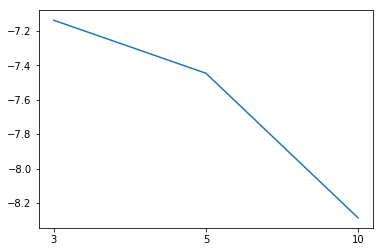

In [44]:
fig, ax = plt.subplots()
plt.plot([e[1] for e in perplexityvalues])
plt.xticks(range(len(perplexityvalues)), [e[0] for e in perplexityvalues])

## Topic Coherence

In this section, we will : 
- estimate the difference in model coherence between the models estimated by filtering or not filtering the extremes in the corpus. This will be done in order to asess whether filtering does improve the quality of the model or not. 
- estimate the difference in coherence among the model estimated on 3, 5, 10 topics. 


### Filtered vs Non- Filtered

DISCLAIMER: I have here arbitrarely choose to estimate the difference on the two models esti,mated for 5 topics. 

In [52]:
cm3 = models.CoherenceModel(model=lda_m1_5, corpus=ldacorpus_m1, dictionary= id2word_m1, coherence='u_mass')  
tfidffcoh = cm3.get_coherence()

cm2 = models.CoherenceModel(model=lda_m2_5, corpus=ldacorpus_m2, dictionary= id2word_m2, coherence='u_mass')  
tfidffiltercoh = cm2.get_coherence()
print( "Coherence of the tf-idf model without extemes: {}\nCoherence of tf-idf model with extremes = {}".format(tfidffiltercoh,tfidffcoh ))

Coherence of the tf-idf model without extemes: -2.0868994483669967
Coherence of tf-idf model with extremes = -4.993401237190249


As we can see here, the coherence of our model is imporved by removing the extremes (the coherence score is higher fot the model without extremes rather than the one before.)

### Different Number of Topics

In [56]:
cm2_3 = models.CoherenceModel(model=lda_m2_3, corpus=ldacorpus_m2, dictionary= id2word_m2, coherence='u_mass')  
cm2_3_coh = cm2_3.get_coherence()

cm2_5 = models.CoherenceModel(model=lda_m2_5, corpus=ldacorpus_m2, dictionary= id2word_m2, coherence='u_mass')  
cm2_5_coh = cm2_5.get_coherence()

cm2_10 = models.CoherenceModel(model=lda_m2_10, corpus=ldacorpus_m2, dictionary= id2word_m2, coherence='u_mass')  
cm2_10_coh = cm2_10.get_coherence()

print( "Coherence of Model with 3 topics: {}\nCoherence of Model with 5 topics = {}\nCoherence of Model with 10 topics = {}".format(cm2_3_coh, cm2_5_coh, cm2_10_coh))

Coherence of Model with 3 topics: -2.0748614222604584
Coherence of Model with 5 topics = -2.0868994483669967
Coherence of Model with 10 topics = -2.2316611832141597


As we can seee here, the highest coherence is associated with the model estimated on three topics. This was also the model with the lowest perplexity score: it seems to be the best model for the considered data.  

In [69]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda_m2_3,ldacorpus_m2,id2word_m2, sort_topics= True)
pyLDAvis.display(lda_display)

## Saving topic scores to a file

In [61]:
scoresperdoc=lda_m2_3.inference(ldacorpus_m2)

In [62]:
len(scoresperdoc[0])

123

In [63]:
df = pd.DataFrame.from_records(scoresperdoc[0])
df.head()

,0,1,2
0,4.966229,283.891785,521.141968
1,29.742079,26.868910,0.389014
2,0.390328,319.412292,15.197386
3,124.906227,0.393912,11.699858
4,159.150070,0.412825,3.437095


In [67]:
df2 = df.applymap(lambda x: int(x>10))
df2.head()

,0,1,2
0,0,1,1
1,1,1,0
2,0,1,1
3,1,0,1
4,1,0,0


## HEATMAP

Here we can see an heatmap that represents the distribution of each topic within each of the blogposs that we have analyzed.

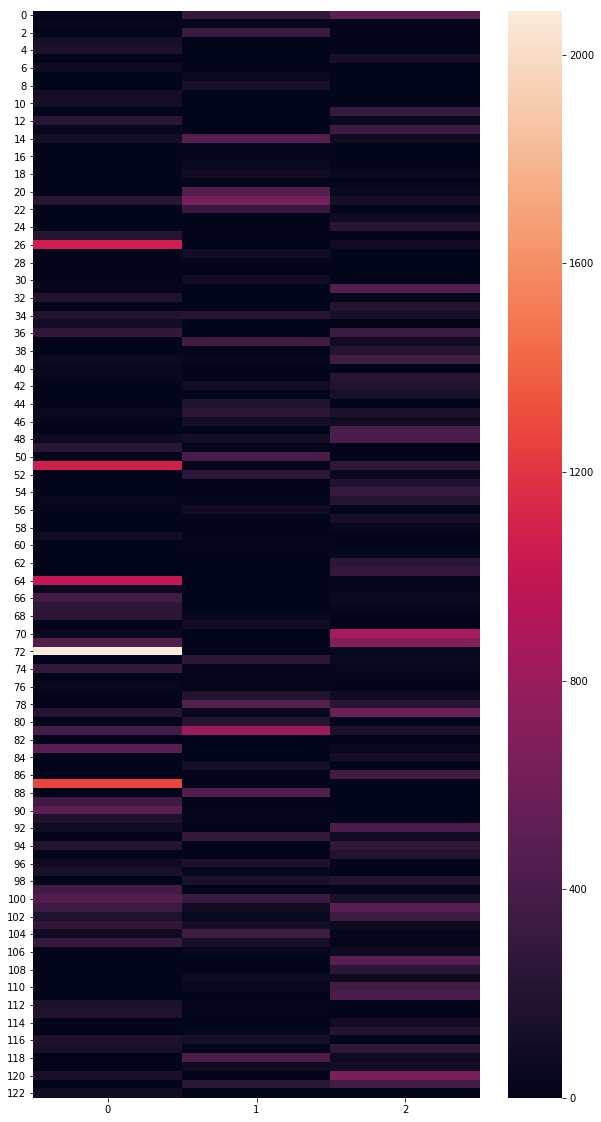

In [65]:
plt.figure(figsize=(10, 20))
sns.heatmap(df)